# Homework 5
## ECE204 Data Science & Engineering

*This notebook uses `X` for multiple problems, and that variable may end up being used for the wrong problem. To start fresh, restart the kernel in the Kernel menu or with the <span class="jp-RefreshIcon jp-Icon jp-Icon-16 jp-ToolbarButtonComponent-icon"></span> button above.*

### Import Statements

In [34]:
## provide your import statements here
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

---
**Problem 1.** On the MNIST dataset, **find the number of principle components that are required to explain Y%** (Y is given to you in Canvas) **of the variance.**

In [7]:
data = np.load("mnist.npz")
X = data["X"]
X.shape

(70000, 784)

In [9]:
# your code here
pca = PCA()
pca.fit(X)
cum_var = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cum_var >= 0.99) + 1

print(f"Number of principal components to explain 99% of the variance: {n_components}")


Number of principal components to explain 99% of the variance: 331


---
**Problem 2.** Consider the MNIST dataset again. The data shape should indicate there are 70,000 samples with 784 features each. Now suppose we want to reduce the number of dimensions in this dataset by an order of magnitude, and find out how the total explained variance changes going from one case to the next.

Specifically, run PCA independently 3 times on this data reducing the data to the dimensions assigned to you in Canvas. **How much variance is explained by this many principal components?**

In [ ]:
data = np.load("mnist.npz")
X = data["X"]

In [10]:
# your code here
n_components = [300, 30, 3]
explained_variances = []

for n in n_components:
    pca = PCA(n_components = n)
    pca.fit(X)
    explained_variances.append(sum(pca.explained_variance_ratio_) * 100)

for n, variance in zip(n_components, explained_variances):
    print(f"{n} PCs: {variance: .1f}%")

300 PCs:  98.6%
30 PCs:  73.2%
3 PCs:  23.1%


---
**Problem 3.** Suppose you have a dataset with a large number of dimensions, and want to perform clustering on it in a lower dimensional space.

On the MNIST dataset, **reduce the number of dimensions to 3 (from 784) using PCA, and then run KMeans clustering on this reduced dataset assuming 10 clusters** since we have the prior knowledge that there are 10 categories of digits in MNIST, 0-9.

**Which cluster centers are obtained through this process?** The cluster centers below are accurate to at least one unit.

`Note:` Set `random_state=42` in both KMeans and PCA. e.g., `PCA(n_components=x, random_state=42)`. This is similar to setting a random seed.



In [12]:
data = np.load("mnist.npz")
X = data["X"]
X.shape

(70000, 784)

In [13]:
# your code here
pca = PCA(n_components = 3, random_state = 42)
X_reduced = pca.fit_transform(X)

kmeans = KMeans(n_clusters = 10, random_state = 42)
kmeans.fit(X_reduced)

cluster_centers = kmeans.cluster_centers_
print(cluster_centers)

C:\Users\16089\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[-146.17829879 -143.93724483  490.38161513]
 [  65.9709393   745.07232729 -384.07904207]
 [   3.90616258 -591.73613494 -128.18371425]
 [1227.53445786 -271.70437443 -163.11441797]
 [ 393.67553863   58.46953043  -15.05674776]
 [ 765.09618493 -114.37481504  702.60843109]
 [ -92.37232538  654.27157507  338.10666686]
 [-809.90160901 -414.44038422  116.60063496]
 [ 207.27215162 -388.70769896 -737.81233114]
 [-458.63375181  283.47873138 -193.8264294 ]]


---
**Problem 4.**
1. Perform PCA on the data (`X`) in `synthetic1.csv` with `n_components=1`. <br>
2. Now, get the inverse transform on the transformed data to reconstruct your input to it's original dimensions. Let's call this reconstructed data `X_hat`. <br>

**For sanity check**: What shape is the data in `X`, and what is the shape of `X_hat` = inverse_transform(fit_transform(X))? Ideally, `X_hat` should be similar to `X`.

**Mark all answers that are true.** <br>

`NOTE:` To visualize the data, make a scatter plot.

In [14]:
df_s1 = pd.read_csv("synthetic1.csv")

# Use X for PCA 
X = df_s1.values
print("Shape of X:", X.shape)

df_s1.head()

Shape of X: (400, 2)


,x0,x1
0,0.155579,-0.061002
1,0.800925,-0.673015
2,-0.160963,0.184892
3,-0.255417,-0.102550
4,-0.287911,0.106978


Shape of X_hat: (400, 2)


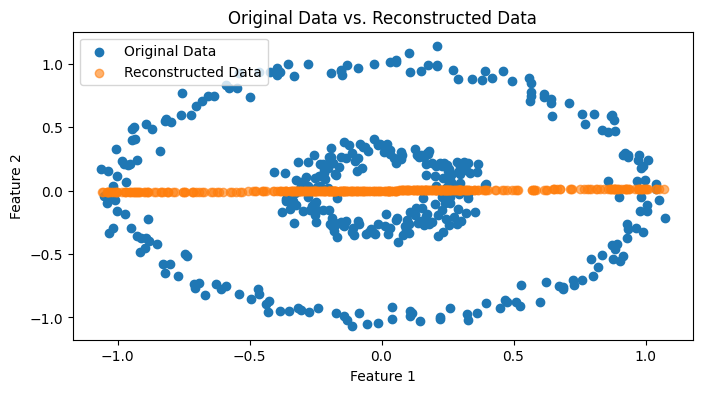

In [16]:
# your code here
pca = PCA(n_components = 1)
X_transformed = pca.fit_transform(X)

X_hat = pca.inverse_transform(X_transformed)
print("Shape of X_hat:", X_hat.shape)

plt.figure(figsize = (8,4))
plt.scatter(X[:, 0], X[:, 1], label = "Original Data")
plt.scatter(X_hat[:, 0], X_hat[:, 1], label = "Reconstructed Data", alpha = 0.6)
plt.legend()
plt.title("Original Data vs. Reconstructed Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


---
**Problem 5. Which feature in `cars.csv` has the variance with the highest numerical value?**


In [17]:
df_cars = pd.read_csv("cars.csv")
df_cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Weight_in_lbs
0,12.0,8,307.0,130.0,18.0,3504
1,11.5,8,350.0,165.0,15.0,3693
2,11.0,8,318.0,150.0,18.0,3436
3,12.0,8,304.0,150.0,16.0,3433
4,10.5,8,302.0,140.0,17.0,3449


In [19]:
# your code here
variances = df_cars.var()
column_highest_var = variances.idxmax()
highest_var = variances.max()
column_highest_var

'Weight_in_lbs'

---
**Problem 6.** Perform PCA on the `cars.csv` dataset, and find 6 principal components. The data can be transformed by PCA into 6 dimensions. <br>
Now, perform the inverse transform on the transformed data (e.g., `X_hat = inverse_transform(transform(X))`).

**Is the approximation `X_hat` equal to the original data `X`, and why?**

`NOTE:` To check if they are same, we can just subtract the two vectors and find the absolute sum. Round the sum to 2 decimal place and check if its 0.0. If this sum is zero, we'll know that they are same.

In [24]:
df_cars = pd.read_csv("cars.csv")
X = df_cars.values
df_cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Weight_in_lbs
0,12.0,8,307.0,130.0,18.0,3504
1,11.5,8,350.0,165.0,15.0,3693
2,11.0,8,318.0,150.0,18.0,3436
3,12.0,8,304.0,150.0,16.0,3433
4,10.5,8,302.0,140.0,17.0,3449


In [23]:
# your code here
pca = PCA(n_components = 6)
X_transformed = pca.fit_transform(X)

X_hat = pca.inverse_transform(X_transformed)
absolute_sum = np.sum(np.abs(X - X_hat))

rounded_sum = round(absolute_sum, 2)
are_same = rounded_sum == 0.0

print("same?", are_same)

same? True


---
**Problem 7.** Import the data in the `cars.csv` dataset.

`Part 1` Find the number of principle components required to explain Y% (Y is given to you in Canvas) of the variance.<br>

`Part 2` Standardize the original data using [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Now find the number of principle components required to explain Y% of the variance.

**Does standardizing the data change the number of principal components required to explain Y% of the variance in Parts I and II? If so, please elaborate on why. If not, does this result match your expectations?**

In [31]:
df_cars = pd.read_csv("cars.csv")
X = df_cars.values
df_cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Weight_in_lbs
0,12.0,8,307.0,130.0,18.0,3504
1,11.5,8,350.0,165.0,15.0,3693
2,11.0,8,318.0,150.0,18.0,3436
3,12.0,8,304.0,150.0,16.0,3433
4,10.5,8,302.0,140.0,17.0,3449


In [41]:
# your code here
pca = PCA()
pca.fit(X)
explained_var_ratio_cum = np.cumsum(pca.explained_variance_ratio_)
n_components_97 = np.argmax(explained_var_ratio_cum >= 0.97) + 1

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Initialize PCA with a large number of components
pca2 = PCA()
# Fit PCA on the standardized data
pca2.fit(X_standardized)

# Calculate the cumulative explained variance
explained_variance_ratio_cumulative = np.cumsum(pca2.explained_variance_ratio_) 

# Find the number of components needed for 97% explained variance
n_components_97_percent = (explained_variance_ratio_cumulative >= 0.97).sum() + 1
print("Part 1:", n_components_97, "Part 2:", n_components_97_percent)


Part 1: 1 Part 2: 4


---